data_composition_visualization.py Tutorial
====
------------------

#### The purpose of this notebook is to demonstrate how the data_composition_visualization code works, including an explanation of the variables in the script as well as a walk through of the necessary input documents

data_composition_visualization.py creates graphs of the composition along with the statistical and systematic uncertainties of the isotopes present in the given sample. The code returns the graphs for each of the 16 samples. 

The first step imports the necessary modules needed:

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

Each spectra's information on the compositions is loaded onto csv files. Each file contains 27 data entries: three different efficiency measurements (one for the mean, another for the low estimate, and one for the high estimate, all of which are calculated on the efficiencies.py document), three different time measurements (30m, 3h, and 24h measurements), and three different peak entries. Most of the code is written inside a for loop in order to iterate through each of the 16 sample csv's and generate a results graph for each. Before the code is run, the files must also be attained and placed in the correct dirrectory.

['Br-81', 'Na-23', 'Sb-121', 'K-41', 'Rb-85', 'Sb-123', 'Co-59', 'Hg-202', 'Cs-133']


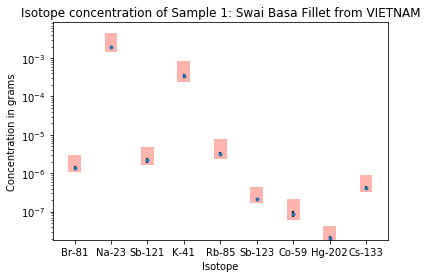

['Br-81', 'Na-23', 'As-75', 'K-41', 'Hg-202', 'Ba-130', 'Sb-121', 'Cs-133', 'Rb-85', 'Se-74', 'Co-59', 'Au-197']


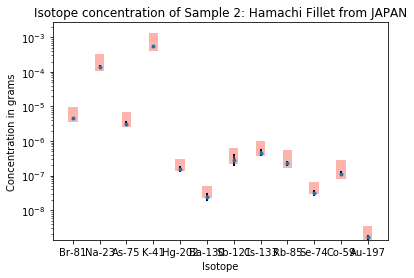

['Br-81', 'Na-23', 'Co-59', 'Se-74', 'Hg-202', 'Rb-85', 'Sb-123', 'Cs-133', 'K-41', 'As-75']


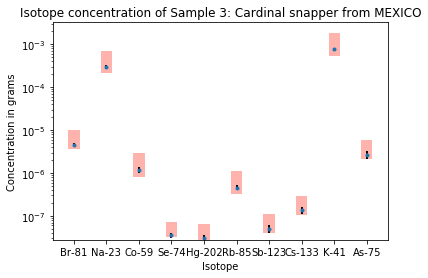

['Br-81', 'K-41', 'Co-59', 'As-75', 'Na-23', 'Ba-130', 'Se-74', 'Cs-133', 'Hg-202', 'Rb-85']


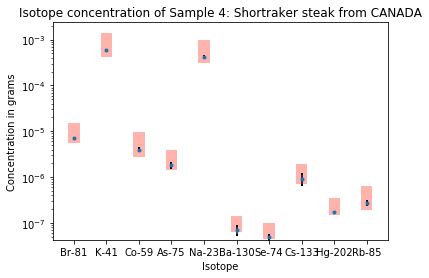

['Br-81', 'K-41', 'Co-59', 'As-75', 'Na-23', 'Se-74', 'Rb-85', 'Cs-133', 'Fe-58']


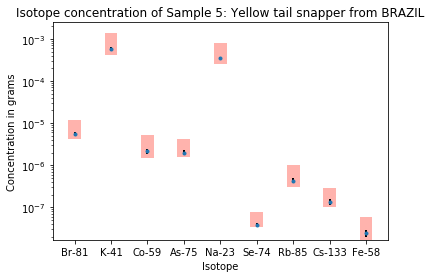

['Na-23', 'K-41', 'Br-81', 'Se-74', 'As-75', 'Cs-133', 'Rb-85', 'Fe-58', 'Co-59', '']


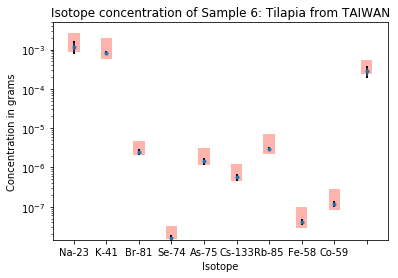

['Na-23', 'K-41', 'Se-74', 'Rb-85', 'Co-59', 'Hg-202', 'Au-197', 'Br-81']


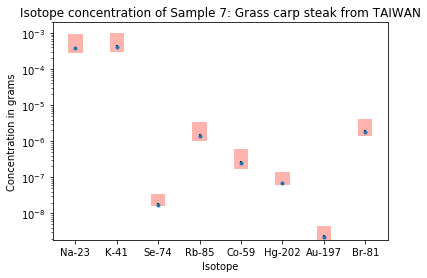

['Br-81', 'As-75', 'K-41', 'Na-23', 'Co-59', 'Se-74', 'Hg-202', 'Rb-85', 'Cs-133']


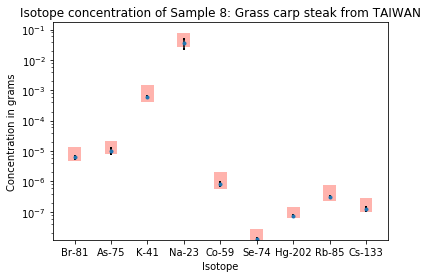

['Br-81', 'As-75', 'K-41', 'Na-23', 'Au-197', 'Se-74', 'Hg-202', 'Sc-45', 'Cs-133', 'Co-59', 'Rb-85']


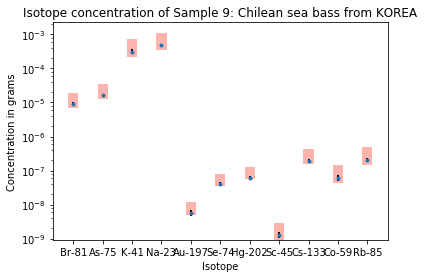

['Br-81', 'Na-23', 'As-75', 'K-41', 'Sb-121', 'Ba-130', 'Co-59', 'Hg-202', 'Sc-45', 'Cs-133', 'Rb-85', 'Se-74']


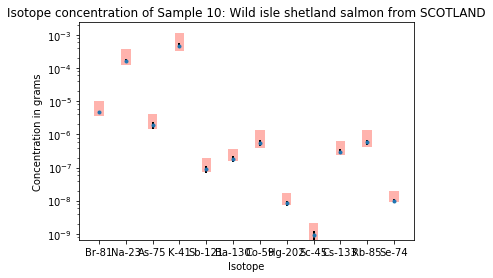

['Br-81', 'Na-23', 'As-75', 'K-41', 'Co-59', 'Hg-202', 'Se-74', 'Fe-58', 'Sc-45', 'Rb-85']


/Users/jackiegasca/anaconda3/envs/py34/lib/python3.4/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jackiegasca/anaconda3/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


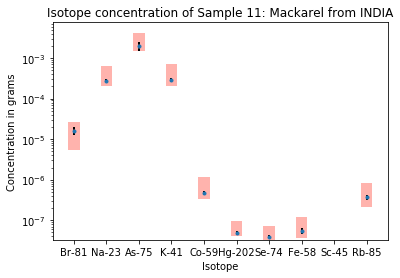

['K-41', 'Na-23', 'Br-81', 'As-75', 'Co-59', 'Hg-202', 'Sb-121', 'Rb-85', 'Sb-123', 'Cs-133', 'Se-74']


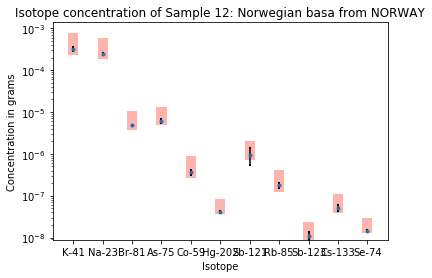

['K-41', 'Co-59', 'Br-81', 'As-75', 'Cs-133', 'Na-23', 'Rb-85', 'Se-74', 'Hg-202']


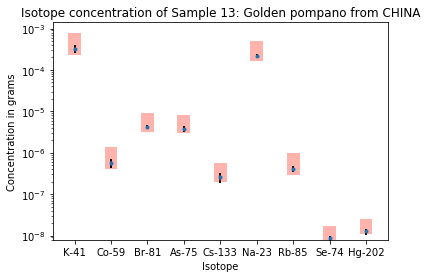

['Na-23', 'Br-81', 'K-41', 'As-75', 'Rb-85', 'Co-59', 'Sc-45', 'Cs-133', 'Hg-202', 'Se-74']


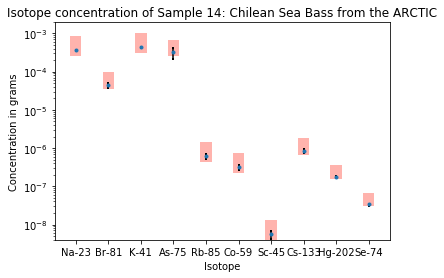

['Na-23', 'K-41', 'Co-59', 'Se-74', 'Sr-84', 'Sc-45', 'As-75', 'Hg-202', 'Rb-85', 'Fe-58', 'Br-81']


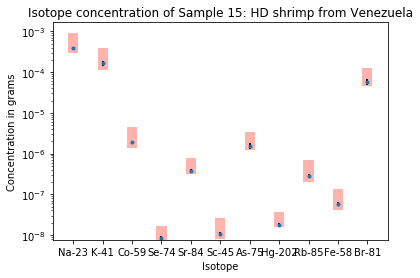

['K-41', 'Br-81', 'Na-23', 'Hg-202', 'Co-59', 'Se-74', 'Cs-133', 'Sc-46']


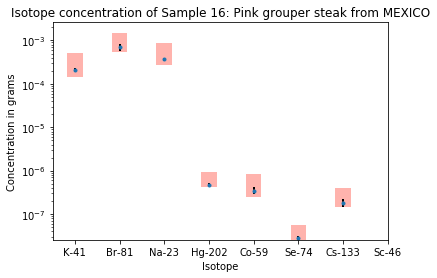

In [4]:
spectraQuantity = np.linspace(1,16,16) #an array containing an index per csv file
for quan in spectraQuantity:
    quan = int(quan) #convert the float into an int to get rid of the unecessary decimal
    #The csv files are named NAA_results_with_efficiencies#, so it is easy to call each one
    #For the step below, modify the line to the directory in which the files are located in.
    spectra = '/Users/jackiegasca/Documents/radwatch-analysis/NAA_results_with_efficiencies'+str(quan)+'.csv'

    f = open(spectra, 'r')
    reader = csv.reader(f)

    rows = []
    for row in reader:
        rows.append(row)

    #Each csv has the present isotopes located on the second cell of the last row of the csv
    #This step is in charge of locating them and placing them in an array
    contents = rows[len(rows)-1][1]
    fish = rows[len(rows)-1][2] #This step locates the data on the graph with the fish information.
    elements = contents.split(', ')
    print(elements)

    #'values' below is a dictionary. Each isotope will be entered as a key and the concentrations of 
    #each isotope will be stored as its values -one for the concentration, another for its uncertainty
    #in the form of arrays. 
    values = {}
    for i in elements:

        iso_conc = []
        iso_unc = []
        for row in rows:
            for j in row:
                string = 'g of ' + i
                if string in j: #This step looks for the cells containing the given isotope to extract its values.
                    num, unc = j.split(' +/- ')
                    unc, extra = unc.split(' g') #This step gets rid of the extra string objects attached at the end.
                    
                    #if the concentration is already existant in the array, it is a redundancy and therefore not added
                    if num in iso_conc: 
                        pass
                    else:
                        iso_conc.append(float(num))
                        iso_unc.append(float(unc))

                else:
                    pass
        values[i] = iso_conc, iso_unc
    lowef_avg_conc = [] #This is the high point of the systematic uncertainty
    lowef_avg_unc = []
    midef_avg_conc = [] #This is the supposed concentration of the isotope
    midef_avg_unc = [] #This is the statistic uncertainty of each isotope
    highef_avg_conc = [] #This is the low point of the systematic uncertainty
    highef_avg_unc = []
    total_error = []
    for i in elements:
        arr_size =len(values[i][0]) #This gives the amount of concentration data entries for each isotope
        #Each isotope is present in equal amounts for the three systematic efficiencies so the step below 
        #splits the data into three equal bins in order of lowest to highest efficiency.
        amount = int(arr_size / 3)
        #The concentrations and uncertainty are weighed into an average and returned as a single number
        lowef_avg_conc.append(np.mean(values[i][0][0:amount]))
        lowef_avg_unc.append(np.mean(values[i][1][0:amount]))
        midef_avg_conc.append(np.mean(values[i][0][amount:amount+amount]))
        midef_avg_unc.append(np.mean(values[i][1][amount:amount+amount]))
        highef_avg_conc.append(np.mean(values[i][0][amount+amount:arr_size]))
        highef_avg_unc.append(np.mean(values[i][1][amount+amount:arr_size]))
        total_error.append(np.mean(values[i][0][0:amount])-np.mean(values[i][0][amount+amount:arr_size]))

    #The steps below generate the graphs
    #First, the x axis is created, an x mark per isotope. 
    x=np.linspace(1,len(elements),len(elements))

    mpl_fig = plt.figure()
    ax = mpl_fig.add_subplot(111)
    width = 0.35
    #p3 creates the line error bars for the statistical uncertainty
    p3 = plt.errorbar(x, midef_avg_conc, yerr=midef_avg_unc, fmt='.', ecolor='black', capthick=2, capsize=1)
    #p2 creates an invisible bar between the the ground value and the low point of the uncertainty
    #The point of this is to create the floating effect of the concentration.
    p1 = ax.bar(x, midef_avg_conc, width, color='white')
    #p2 created the salmon colored systematic uncertainty bars
    p2 = ax.bar(x, lowef_avg_conc, width, color=(1.0,0.7,0.68),
             bottom=highef_avg_conc)
    plt.xlabel('Isotope')
    plt.ylabel('Concentration in grams')
    plt.title('Isotope concentration of Sample '+str(quan)+': '+fish)
    plt.xticks(x, elements)
    ax.set_yscale('log')
    plt.show()


##### *Additional comments*: The log scale on the y-axis creates and uneven appearance between the low point of the efficiency and the high point.  The statistical uncertainty bars are barely visible because the statistical uncertianty is very small compared to the systenmatic uncertainty. 